# Boilerplate

In [1]:
import bayesian_multitarget_latent_factors as bmlf
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import xarray as xr

rng = np.random.default_rng(999)

In [2]:
def plot_all_B_dict(B_dict, ax = None):
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(13,8))
    else:
        fig = ax.get_figure()
    for i in range(B_dict['p']):
        bmlf.plot_col_basis_dict(B_dict, col_idx=i, ax=ax)
    ax.get_legend().set_visible(False)
    ax.set_title('')
    return fig, ax

# Prior and Dataset Generation

## Basis Matrix Build

(<Figure size 1300x800 with 1 Axes>, <Axes: xlabel='X Axis', ylabel='Value'>)

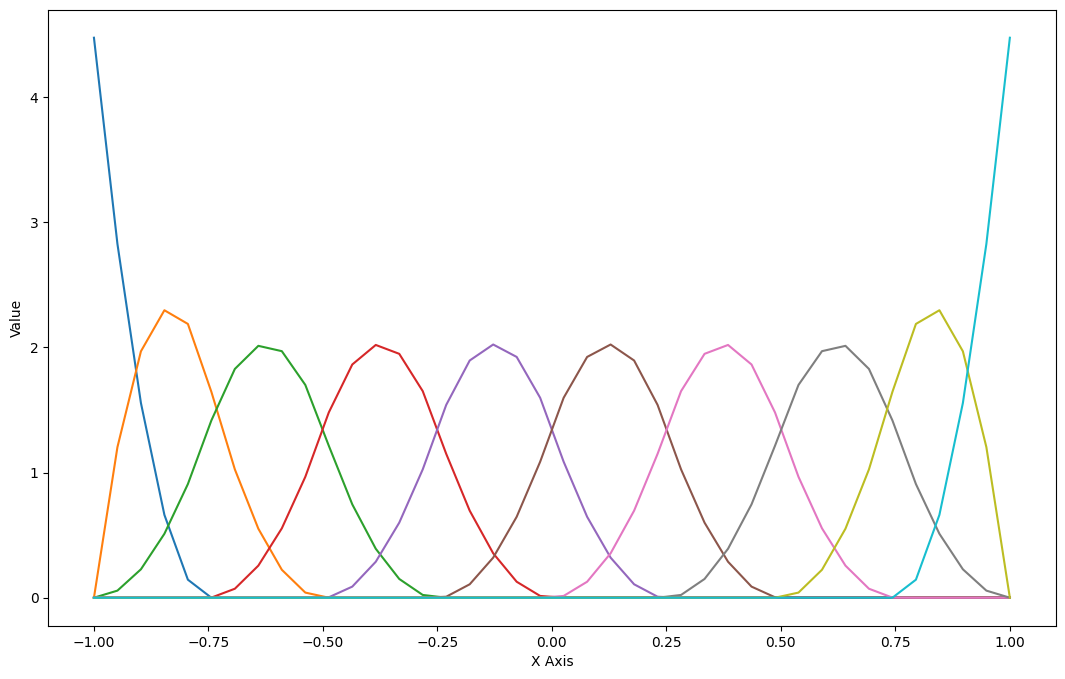

In [3]:
B1 = bmlf.make_basis_dict_structured(
    basis_type='bspline',
    dimensionality=1,
    p=3,
    n_basis=10,
    domain_range=(-1, 1),
    num_points=40,
    add_optional_terms='no',
)
plot_all_B_dict(B1)

(<Figure size 1300x800 with 1 Axes>, <Axes: xlabel='X Axis', ylabel='Value'>)

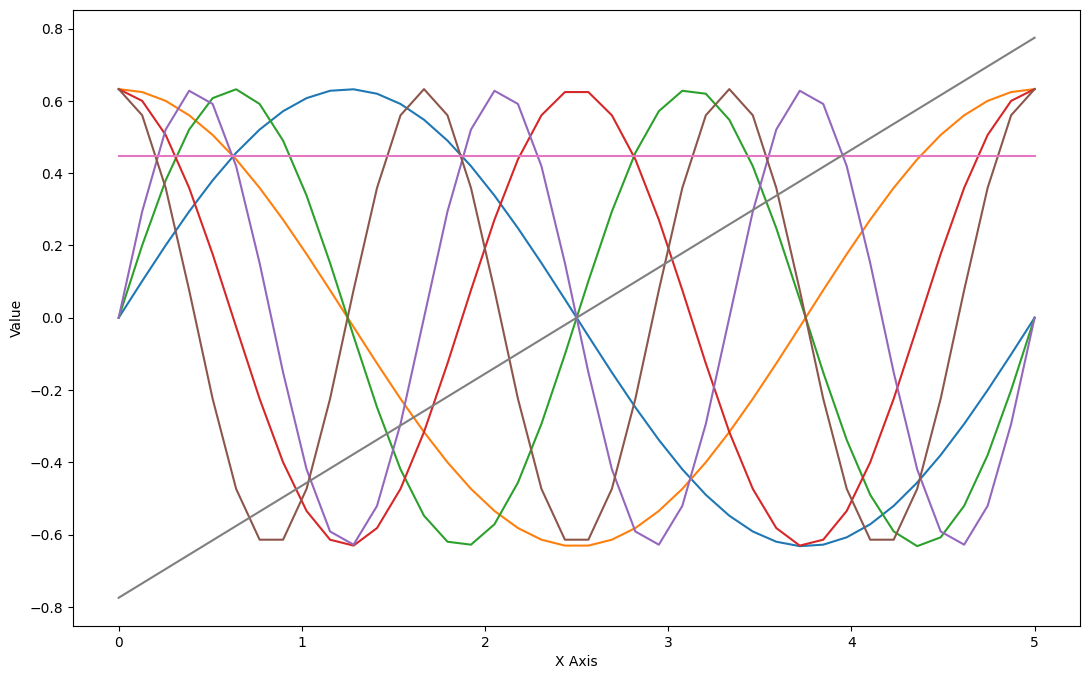

In [4]:
B2 = bmlf.make_basis_dict_structured(
    basis_type='fourier',
    dimensionality=1,
    n_basis=6,
    domain_range=(0, 5),
    grid_spacing=None,
    num_points=40,
    add_optional_terms='linear',
)
plot_all_B_dict(B2)

## Hyperparameters and Data Generation

In [5]:
N_train = 100
N_test = 50

hyperparams_dict = \
bmlf.initialize_hyperparams_dict(
    k=4,
    v=4,
    nu=4,
    ψ_alpha=5,
    ψ_beta=4,
    ψ_sigma_1=1.0,
    ψ_sigma_2=1.0,
    θ_alpha=5,
    θ_beta=4,
    θ_sigma_1=1.0,
    θ_sigma_2=1.0,
    alpha_1=2.1,
    alpha_2=2.5,
)

generator_dict = bmlf.make_prior_dict(
    hyperparams_dict,
    B1,
    B2,
    N = N_train + N_test,
    r = 5
)

In [6]:
generator_dict['X'] = rng.normal(scale = 0.3, size=generator_dict['X'].shape)

generator_sample_ds = \
bmlf.sample_from_prior(
    data_dic = generator_dict,
    X_test = np.zeros((generator_dict['r'],1)),
    n_samples = 5,
    rng_seed = rng.integers(1000000),
)

In [7]:
prior_dict = bmlf.make_prior_dict(
    hyperparams_dict,
    B1,
    B2,
    y1 = generator_sample_ds.sel(sample=0)['y1_predictive'].values[:,:N_train],
    y2 = generator_sample_ds.sel(sample=0)['y2_predictive'].values[:,:N_train],
    X = generator_dict['X'][:,:N_train]
)

In [8]:
test_set_dic = {
    'y1' : generator_sample_ds.sel(sample=0)['y1_predictive'].values[:,N_train:],
    'y2' : generator_sample_ds.sel(sample=0)['y2_predictive'].values[:,N_train:],
    'X' : generator_dict['X'][:,N_train:]
}

## Prior Predictive Statistics

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

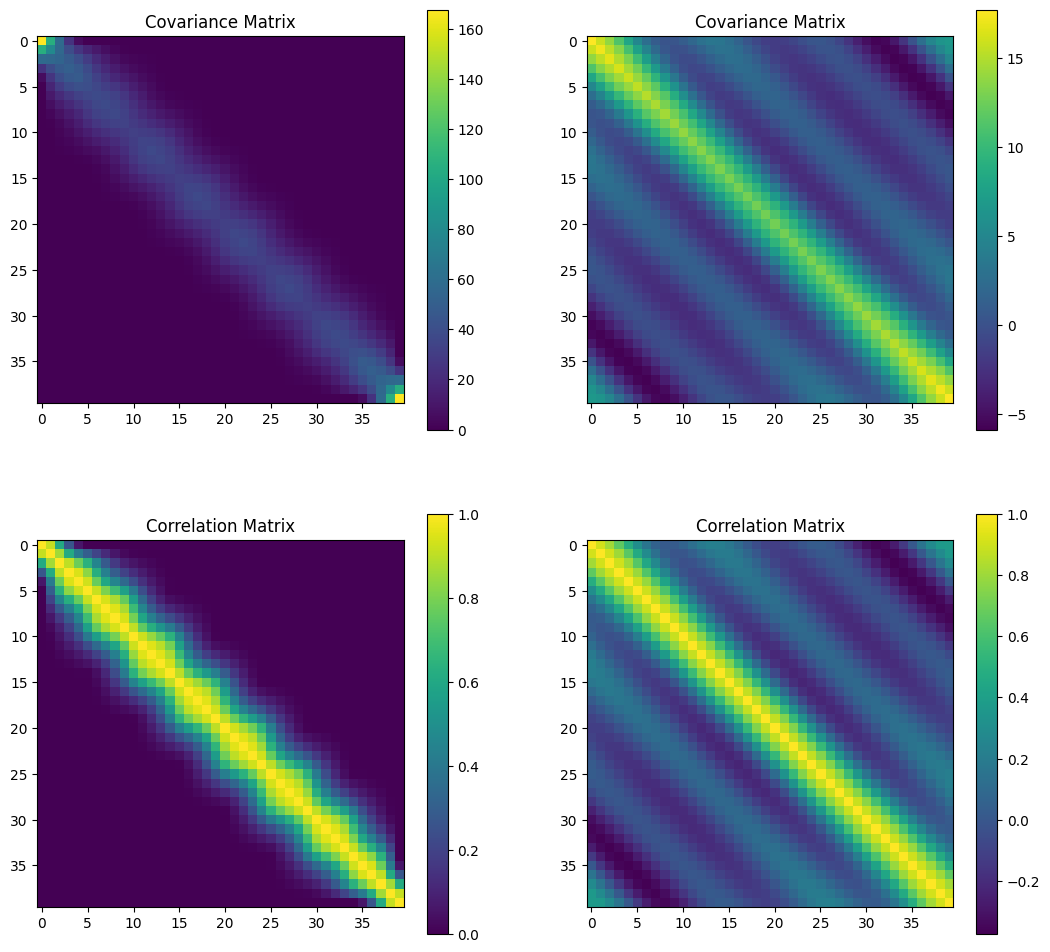

In [9]:
bmlf.prior_predictive_properties_from_prior_dict(prior_dict)

# Posterior Sampling

In [10]:
out_dir = './SIS2024_posterior'

In [11]:
from os.path import isfile

if not isfile(out_dir + '/idata.nc'):
    idata = \
    bmlf.sample_from_posterior_moore_penrose_trick(
        prior_dict,
        rng.integers(1000000),
        stan_file_path=None,
        output_dir=out_dir,
        laplace_draws=100,
        iter_warmup=500,
        iter_sampling=1000,
        do_prior_sampling=False,
        max_treedepth=12,
        X_test=None,
        skip_Laplace=False
    )
    idata.to_netcdf(out_dir + '/idata.nc')

    prior_dict['k'] = 2
    idata2 = \
    bmlf.sample_from_posterior_moore_penrose_trick(
        prior_dict,
        rng.integers(1000000),
        stan_file_path=None,
        output_dir=out_dir+'/2',
        laplace_draws=100,
        iter_warmup=500,
        iter_sampling=1000,
        do_prior_sampling=False,
        max_treedepth=12,
        X_test=None,
    )
    idata2.to_netcdf(out_dir + '/2/idata2.nc')
    
    prior_dict['k'] = 3
    idata3 = \
    bmlf.sample_from_posterior_moore_penrose_trick(
        prior_dict,
        rng.integers(1000000),
        stan_file_path=None,
        output_dir=out_dir+'/3',
        laplace_draws=100,
        iter_warmup=500,
        iter_sampling=1000,
        do_prior_sampling=False,
        max_treedepth=12,
        X_test=None,
    )
    idata3.to_netcdf(out_dir + '/3/idata3.nc')
    
    prior_dict['k'] = 5
    idata5 = \
    bmlf.sample_from_posterior_moore_penrose_trick(
        prior_dict,
        rng.integers(1000000),
        stan_file_path=None,
        output_dir=out_dir+'/5',
        laplace_draws=100,
        iter_warmup=500,
        iter_sampling=1000,
        do_prior_sampling=False,
        max_treedepth=12,
        X_test=None,
    )
    idata5.to_netcdf(out_dir + '/5/idata5.nc')
    
    prior_dict['k'] = 6
    idata6 = \
    bmlf.sample_from_posterior_moore_penrose_trick(
        prior_dict,
        rng.integers(1000000),
        stan_file_path=None,
        output_dir=out_dir+'/6',
        laplace_draws=100,
        iter_warmup=500,
        iter_sampling=1000,
        do_prior_sampling=False,
        max_treedepth=12,
        X_test=None,
    )
    idata6.to_netcdf(out_dir + '/6/idata6.nc')
    
else:
    idata = az.from_netcdf(out_dir + '/idata.nc')
    idata2 = az.from_netcdf(out_dir + '/2/idata2.nc')
    idata3 = az.from_netcdf(out_dir + '/3/idata3.nc')
    idata5 = az.from_netcdf(out_dir + '/5/idata5.nc')
    idata6 = az.from_netcdf(out_dir + '/6/idata6.nc')
    

# Exploration of Posterior Distribution

## Compare PSIS-LOO

In [12]:
az_compare_res = \
az.compare(
    {
        '2 LF': idata2,
        '3 LF': idata3,
        '4 LF': idata,
        '5 LF': idata5,
        '6 LF': idata6,            
    },
    ic = 'loo'
)

/home/br1/PythonProjects/github/repo_bayesian_multitarget_latent_factors/examples/venv/lib/python3.10/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/br1/PythonProjects/github/repo_bayesian_multitarget_latent_factors/examples/venv/lib/python3.10/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-rob

In [13]:
az_compare_res

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
4 LF,0,-12856.991391,92.711902,0.000000,0.948442,59.301051,0.000000,True,log
5 LF,1,-12860.133628,103.288034,3.142237,0.000000,59.315034,1.095314,True,log
6 LF,2,-12860.380624,103.317596,3.389233,0.000000,59.285162,1.279676,True,log
3 LF,3,-12906.743068,79.396145,49.751677,0.041226,59.884785,12.320070,True,log
2 LF,4,-13027.016032,65.790386,170.024640,0.010332,67.379052,28.129606,False,log


## Compute $\hat{K}$

In [14]:
loo_res = az.loo(idata)

/home/br1/PythonProjects/github/repo_bayesian_multitarget_latent_factors/examples/venv/lib/python3.10/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


In [15]:
loo_res

Computed from 4000 posterior samples and 100 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -12856.99    59.30
p_loo       92.71        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       91   91.0%
 (0.5, 0.7]   (ok)          5    5.0%
   (0.7, 1]   (bad)         4    4.0%
   (1, Inf)   (very bad)    0    0.0%

In [16]:
dict_loo_res = dict(loo_res)

In [17]:
def transform_array(arr, thresholds):
    """
    Transform a numpy array of floats to a numpy array of ints based on the given thresholds.

    Parameters:
    - arr: numpy array of floats.
    - thresholds: list of thresholds defining the ranges for transformation.

    Returns:
    - A numpy array of ints where each element is transformed based on the thresholds.
    """
    # Create an output array filled with zeros, initially assuming all values fall into the first category.
    out = np.zeros(arr.shape, dtype=int)
    
    # Iterate over the thresholds, assigning an increasing integer value
    # for each range defined by these thresholds.
    for i, threshold in enumerate(thresholds):
        out[arr > threshold] = i + 1

    return out




In [18]:
# Example usage
arr = np.array([0.1, 0.4, 0.5, 0.6, 0.8, 0.9])
thresholds = [0.5, 0.7]
transformed_arr = transform_array(arr, thresholds)
print(transformed_arr)

[0 0 0 1 2 2]


In [19]:
class_pareto_k = transform_array( dict_loo_res['pareto_k'].values , thresholds )

## Varimax

### Varimax-RSP

In [20]:
Varimax_res_xr = bmlf.Varimax_RSP(idata)
Varimax_res_xr6 = bmlf.Varimax_RSP(idata6)

Rotated sample 0
Rotated sample 500
Rotated sample 1000
Rotated sample 1500
Rotated sample 2000
Rotated sample 2500
Rotated sample 3000
Rotated sample 3500
Starting iteration number 0
	 Previous objective fun =	inf
	 New objective fun =		119170.764
Starting iteration number 1
	 Previous objective fun =	119170.764
	 New objective fun =		47968.908
Starting iteration number 2
	 Previous objective fun =	47968.908
	 New objective fun =		5449.544
Starting iteration number 3
Rotated sample 0
Rotated sample 500
Rotated sample 1000
Rotated sample 1500
Rotated sample 2000
Rotated sample 2500
Rotated sample 3000
Rotated sample 3500
Starting iteration number 0
	 Previous objective fun =	inf
	 New objective fun =		139630.196
Starting iteration number 1
	 Previous objective fun =	139630.196
	 New objective fun =		6930.038
Starting iteration number 2
	 Previous objective fun =	6930.038
	 New objective fun =		6810.537
Starting iteration number 3
	 Previous objective fun =	6810.537
	 New objective fun 

### Project the test set and the training set samples on the Varimaxed Latent Space

In [21]:
# Use everything when projecting the test set (partial information is also allowed, but X must be always provided)
η_xr = \
bmlf.sample_projection_on_varimaxed_space(123, idata, Varimax_res_xr, X_test=test_set_dic['X'], Y1_test=test_set_dic['y1'], Y2_test=test_set_dic['y2'])

In [22]:
# Extract the η's sampled during the Posterior Distribution Sampling
η_train_xr = \
bmlf.sample_projection_on_varimaxed_space(123, idata, Varimax_res_xr)

Text(0, 0.5, '$\\eta_3$')

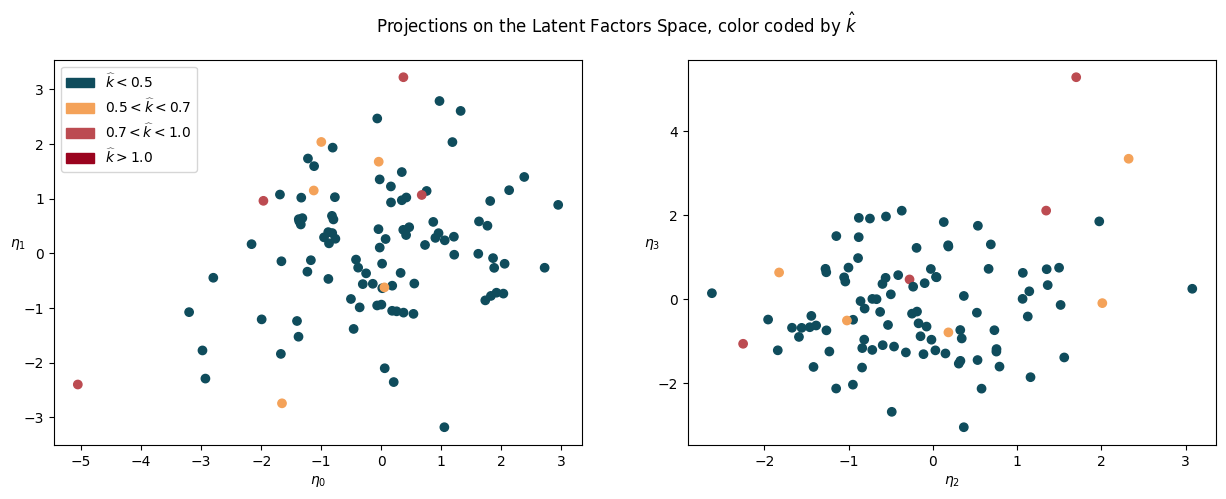

In [23]:
import matplotlib.patches as mpatches
fig, axs = plt.subplots(1,2,figsize=(15,5))

col_seq = ['Midnight green', 'Sandy brown', 'Bittersweet shimmer', 'Carmine']
class_labels = ['Good', 'Ok', 'Bad', 'Very Bad']
class_labels = [r'$\widehat{k} < 0.5$', r'$0.5 < \widehat{k} < 0.7$', r'$0.7 < \widehat{k} < 1.0$', r'$\widehat{k} > 1.0$']

axs[0].scatter(η_train_xr.mean('chain').mean('draw').values.T[:,0],
               η_train_xr.mean('chain').mean('draw').values.T[:,1], c=[bmlf.default_color_dict[col_seq[i]] for i in class_pareto_k])
axs[1].scatter(η_train_xr.mean('chain').mean('draw').values.T[:,2],
               η_train_xr.mean('chain').mean('draw').values.T[:,3], c=[bmlf.default_color_dict[col_seq[i]] for i in class_pareto_k])

legend_patches = [mpatches.Patch(color=bmlf.default_color_dict[col_seq[i]], label=class_labels[i]) for i in range(len(col_seq))]
axs[0].legend(handles=legend_patches, loc='upper left')

fig.suptitle(r'Projections on the Latent Factors Space, color coded by $\hat{k}$')
axs[0].set_xlabel(r'$\eta_0$')
axs[0].set_ylabel(r'$\eta_1$', rotation=0)
axs[1].set_xlabel(r'$\eta_2$')
axs[1].set_ylabel(r'$\eta_3$', rotation=0)

### Varimax the "True" Latent Factors, aligning the result on the results of Varimax-RSP by appropriate Signed Permutations 

In [24]:
rot_Lambda1, rot_Lambda2, rotB1Λ1, rotB2Λ2 = \
bmlf.Varimax_true_lambdas(
    generator_sample_ds.sel(sample=0)['Lambda1'].values.copy(),
    generator_sample_ds.sel(sample=0)['Lambda2'].values.copy(),
    Varimax_res_xr,
    idata
)

## Show Latent Factors and Models Comparison

/home/br1/PythonProjects/github/repo_bayesian_multitarget_latent_factors/examples/venv/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/compareplot.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scale = comp_df["scale"][0]
/tmp/ipykernel_21861/443018801.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticks(), rotation=30)


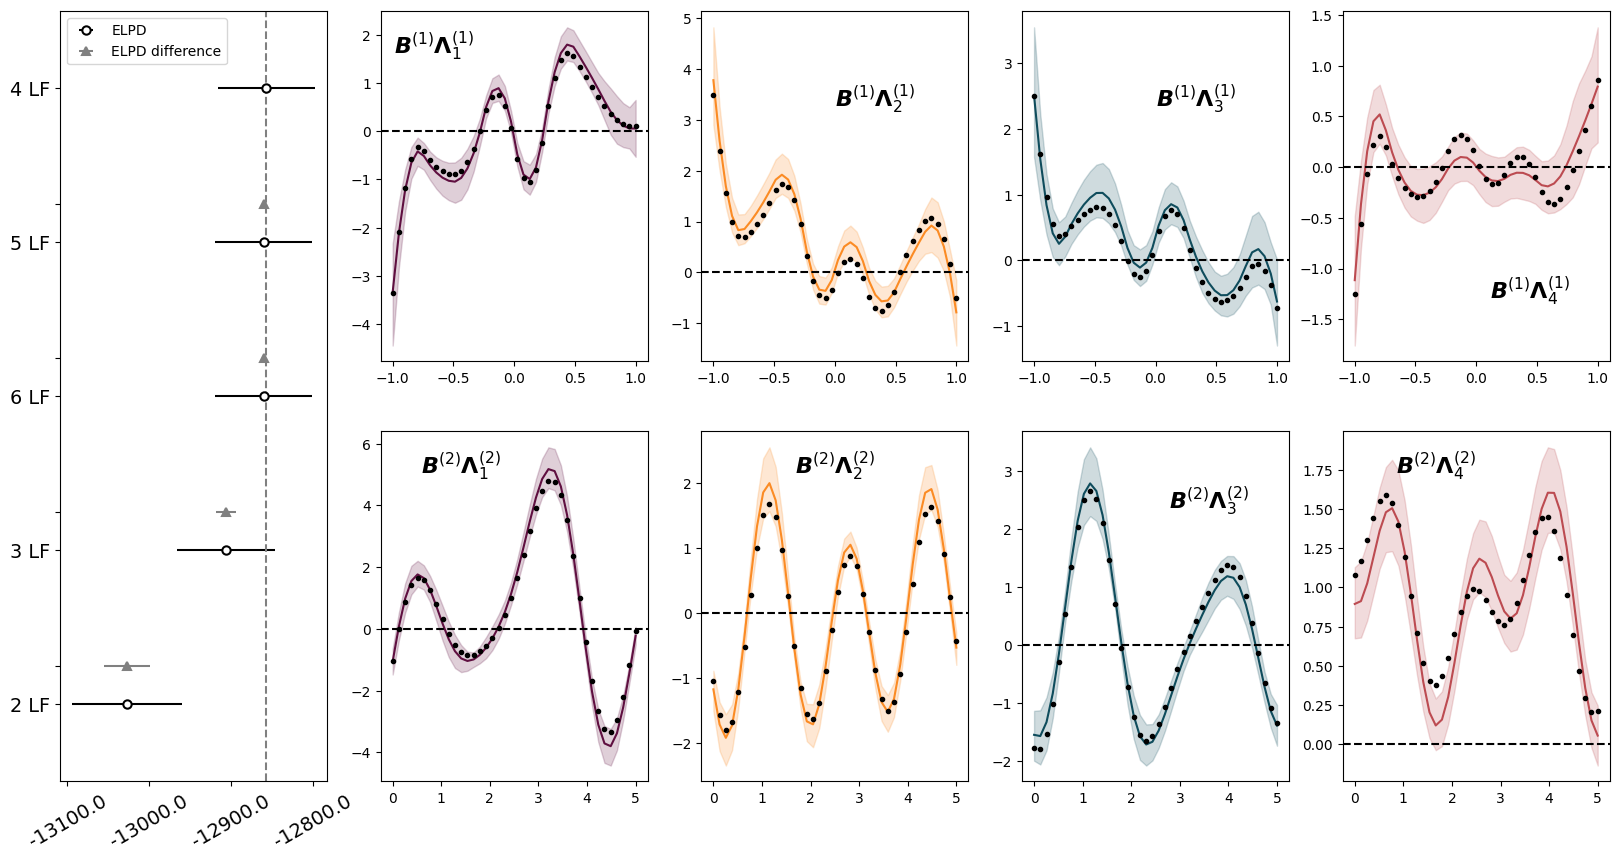

In [25]:
from matplotlib.gridspec import GridSpec

# Create figure
fig = plt.figure(figsize=(20, 10))

# Define the grid layout
grid = GridSpec(2, 5, fig)

# First column, spanning two rows
ax1 = fig.add_subplot(grid[:, 0]) # This subplot spans all rows in the first column

# Other subplots in the grid
ax2 = fig.add_subplot(grid[0, 1]) # Second column, first row
ax3 = fig.add_subplot(grid[1, 1]) # Second column, second row
ax4 = fig.add_subplot(grid[0, 2]) # Third column, first row
ax5 = fig.add_subplot(grid[1, 2]) # Third column, second row
ax6 = fig.add_subplot(grid[0, 3]) # Fourth column, first row
ax7 = fig.add_subplot(grid[1, 3]) # Fourth column, second row
ax8 = fig.add_subplot(grid[0, 4]) # Fifth column, first row
ax9 = fig.add_subplot(grid[1, 4]) # Fifth column, second row

axs = np.array([[ax2,ax4,ax6,ax8],[ax3,ax5,ax7,ax9]])

az.plot_compare(
    az_compare_res,
    ax=ax1
)
ax1.set_title('')
ax1.set_xlabel('')
ax1.legend(loc='upper left')
ax1.set_xticklabels(ax1.get_xticks(), rotation=30)


subplot_labels = [
    [r'$\Lambda_{1}^{(1)}$', r'$\Lambda_{2}^{(1)}$', r'$\Lambda_{3}^{(1)}$', r'$\Lambda_{4}^{(1)}$'],
    [r'$\Lambda_{1}^{(2)}$', r'$\Lambda_{2}^{(2)}$', r'$\Lambda_{3}^{(2)}$', r'$\Lambda_{4}^{(2)}$'],
]

subplot_labels = [
    [r'$\boldsymbol{B}^{(1)}\boldsymbol{\Lambda}_{1}^{(1)}$', r'$\boldsymbol{B}^{(1)}\boldsymbol{\Lambda}_{2}^{(1)}$', r'$\boldsymbol{B}^{(1)}\boldsymbol{\Lambda}_{3}^{(1)}$', r'$\boldsymbol{B}^{(1)}\boldsymbol{\Lambda}_{4}^{(1)}$'],
    [r'$\boldsymbol{B}^{(2)}\boldsymbol{\Lambda}_{1}^{(2)}$', r'$\boldsymbol{B}^{(2)}\boldsymbol{\Lambda}_{2}^{(2)}$', r'$\boldsymbol{B}^{(2)}\boldsymbol{\Lambda}_{3}^{(2)}$', r'$\boldsymbol{B}^{(2)}\boldsymbol{\Lambda}_{4}^{(2)}$'],
]

halignments = np.array(
    [
        ['right','right','right','right',],
        ['right','right','right','right',]
    ]
)
valignments = np.array(
    [
        ['top','top','top','top',],
        ['top','top','top','top',]
    ]
)

xlocs = np.array(
    [
        [0.35,0.80,0.80,0.85,],
        [0.45,0.65,0.85,0.50,],
    ]
)
ylocs = np.array(
    [
        [0.95,0.80,0.80,0.25,],
        [0.95,0.95,0.85,0.95,],
    ]
)


label_font_size = 16


for i in range(4):

    color = bmlf.default_color_dict[list(bmlf.default_color_dict)[2*i]]
    if i == 3:
        color = bmlf.default_color_dict[list(bmlf.default_color_dict)[2*i+3]]
    
    bmlf.uncertain_lineplot(idata.constant_data['t1'].values,
                            bmlf.convert_chain_draw_to_sample(
                                Varimax_res_xr['B1Λ1']
                            ).sel(latent_factor_idx = i).values.T,
                            ax=axs[0,i],
                            color=color
                           )
    axs[0,i].axhline(0.0, linestyle='--', c='k')
    axs[0,i].plot(idata.constant_data['t1'], rotB1Λ1[:,i], 'k.')
    bmlf.uncertain_lineplot(idata.constant_data['t2'].values,
                            bmlf.convert_chain_draw_to_sample(
                                Varimax_res_xr['B2Λ2']
                            ).sel(latent_factor_idx = i).values.T,
                            ax=axs[1,i],
                            color=color
                           )
    axs[1,i].axhline(0.0, linestyle='--', c='k')
    axs[1,i].plot(idata.constant_data['t2'], rotB2Λ2[:,i], 'k.')

    axs[0,i].set_xlabel('')
    axs[1,i].set_xlabel('')
    axs[0,i].set_ylabel('')
    axs[1,i].set_ylabel('')
    
    axs[0, i].text(xlocs[0,i], ylocs[0,i], subplot_labels[0][i], 
                   horizontalalignment=halignments[0,i], verticalalignment=valignments[0,i], 
                   transform=axs[0, i].transAxes, fontsize=label_font_size)
    
    axs[1, i].text(xlocs[1,i], ylocs[1,i], subplot_labels[1][i], 
                   horizontalalignment=halignments[1,i], verticalalignment=valignments[1,i], 
                   transform=axs[1, i].transAxes, fontsize=label_font_size)
    

#axs[0,0].set_ylabel(r'$\mathbf{\Lambda}^{(1)}$', rotation=0)
#axs[1,0].set_ylabel(r'$\mathbf{\Lambda}^{(2)}$', rotation=0)
ax1.set_ylabel('')

fig.savefig('loo_elpd_and_latent_factors.png')

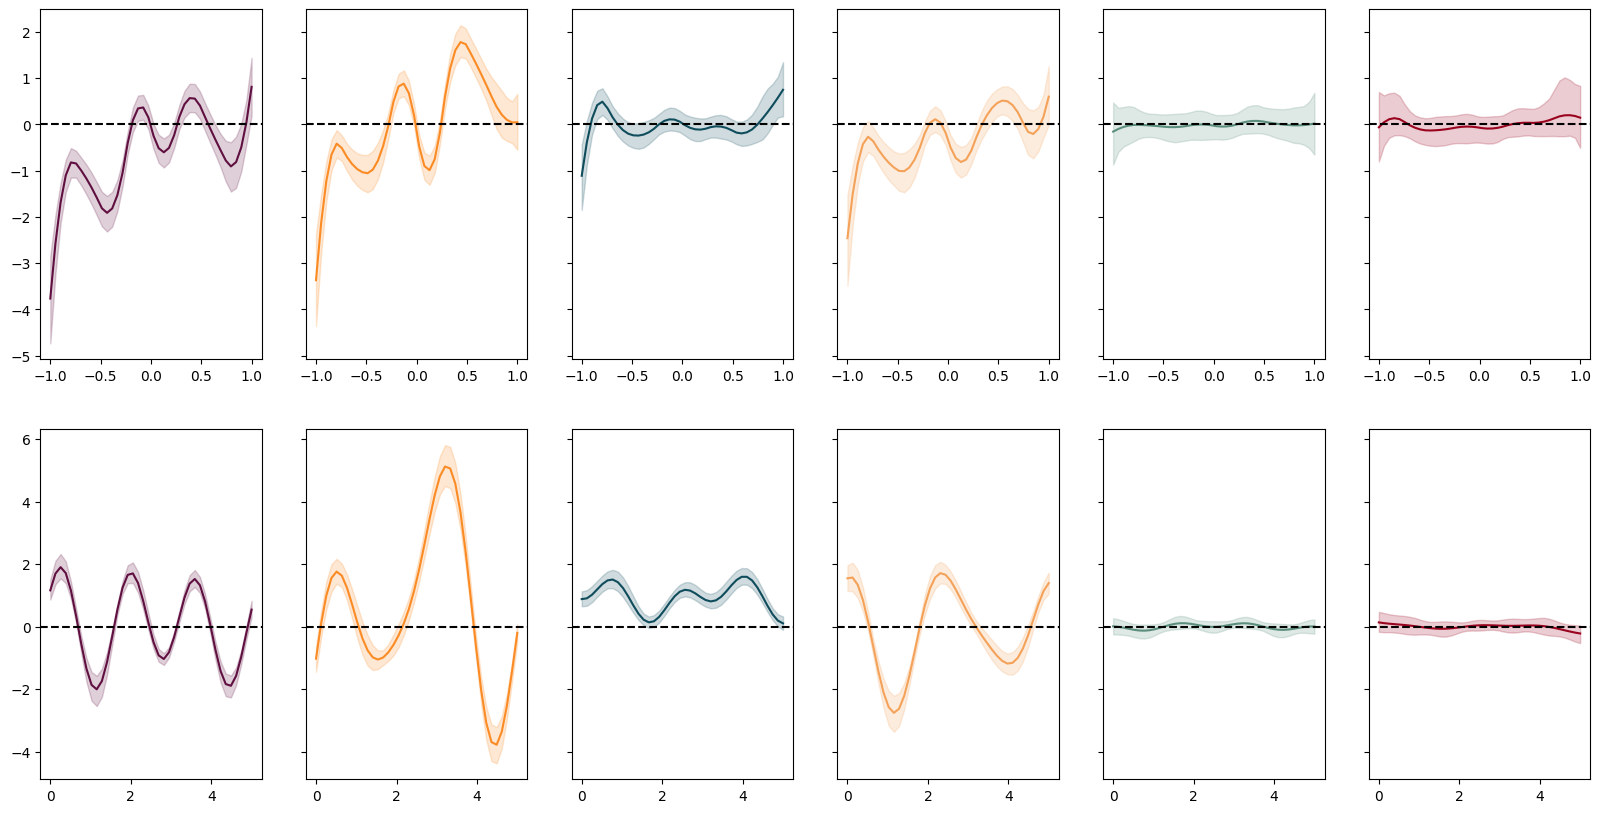

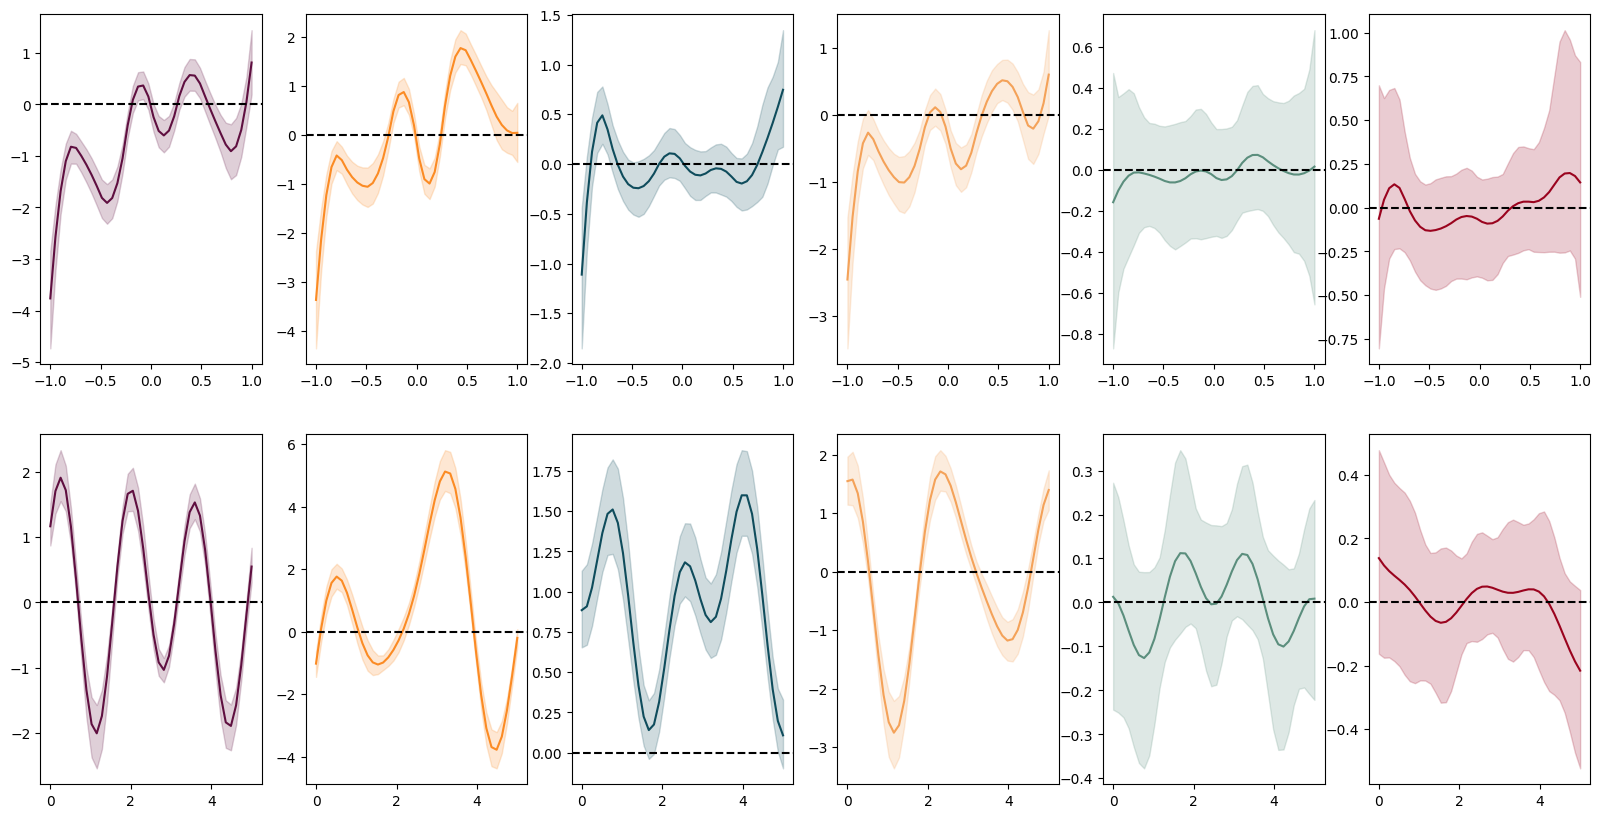

In [26]:
fig, axs = plt.subplots(2,6, figsize=(20,10), sharey='row')
for i in range(6):
    color = bmlf.default_color_dict[list(bmlf.default_color_dict)[(2*i)%9]]
    if i == 3:
        color = bmlf.default_color_dict[list(bmlf.default_color_dict)[2*i+1]]
    bmlf.uncertain_lineplot(idata.constant_data['t1'].values,
                            bmlf.convert_chain_draw_to_sample(
                                Varimax_res_xr6['B1Λ1']
                            ).sel(latent_factor_idx = i).values.T,
                            ax=axs[0,i],
                            color=color
                           )
    axs[0,i].axhline(0.0, linestyle='--', c='k')
    bmlf.uncertain_lineplot(idata.constant_data['t2'].values,
                            bmlf.convert_chain_draw_to_sample(
                                Varimax_res_xr6['B2Λ2']
                            ).sel(latent_factor_idx = i).values.T,
                            ax=axs[1,i],
                            color=color
                           )
    axs[1,i].axhline(0.0, linestyle='--', c='k')
    axs[0,i].set_xlabel('')
    axs[1,i].set_xlabel('')
axs[0,0].set_ylabel('')
axs[1,0].set_ylabel('')

fig, axs = plt.subplots(2,6, figsize=(20,10), sharey=False)
for i in range(6):
    color = bmlf.default_color_dict[list(bmlf.default_color_dict)[(2*i)%9]]
    if i == 3:
        color = bmlf.default_color_dict[list(bmlf.default_color_dict)[2*i+1]]
    bmlf.uncertain_lineplot(idata.constant_data['t1'].values,
                            bmlf.convert_chain_draw_to_sample(
                                Varimax_res_xr6['B1Λ1']
                            ).sel(latent_factor_idx = i).values.T,
                            ax=axs[0,i],
                            color=color
                           )
    axs[0,i].axhline(0.0, linestyle='--', c='k')
    bmlf.uncertain_lineplot(idata.constant_data['t2'].values,
                            bmlf.convert_chain_draw_to_sample(
                                Varimax_res_xr6['B2Λ2']
                            ).sel(latent_factor_idx = i).values.T,
                            ax=axs[1,i],
                            color=color
                           )
    axs[1,i].axhline(0.0, linestyle='--', c='k')
    axs[0,i].set_xlabel('')
    axs[1,i].set_xlabel('')
    axs[0,i].set_ylabel('')
    axs[1,i].set_ylabel('')



## Prediction on Target improves depending on the information presented

### Training Set

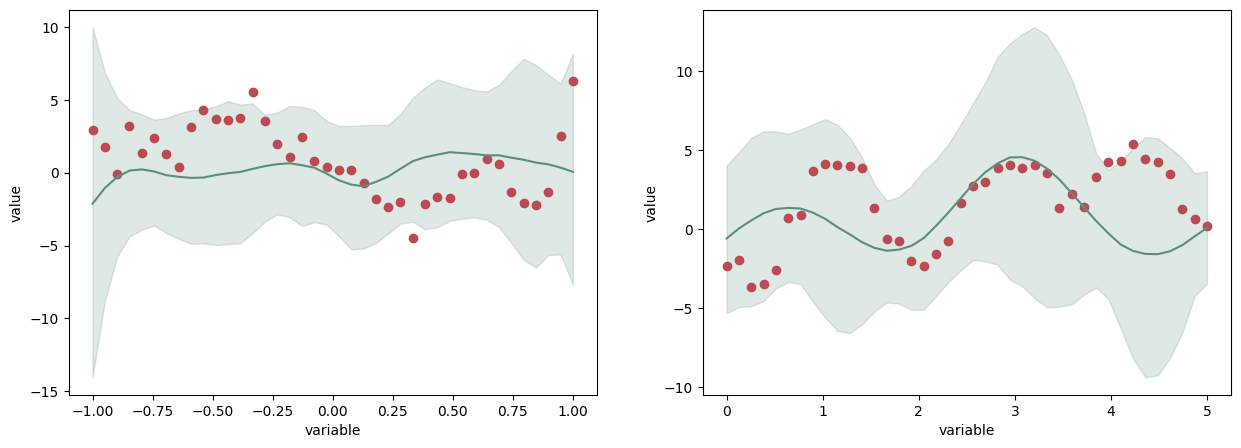

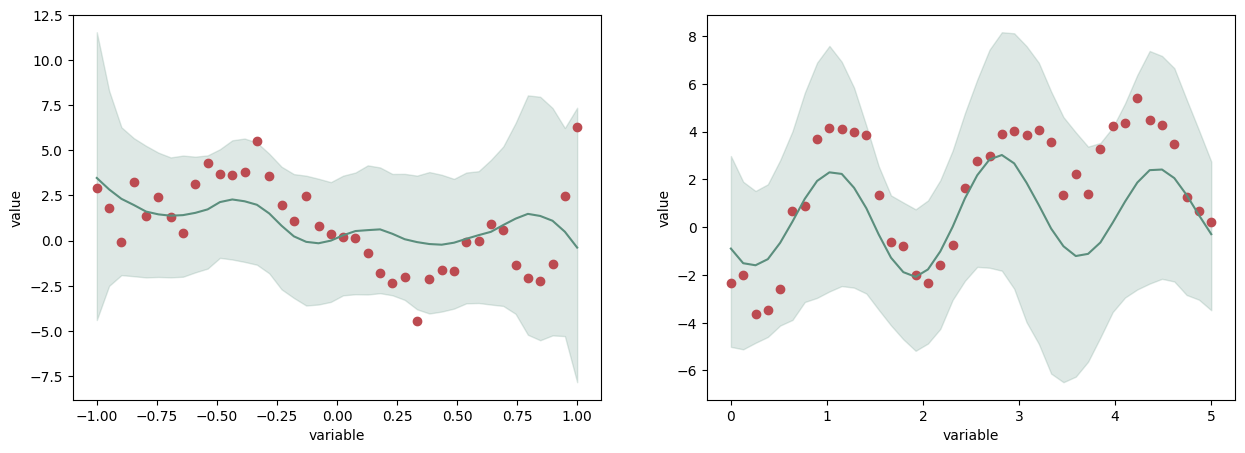

In [27]:
bmlf.plot_Y_training(idata, sample_idx=0, conditional=False)
bmlf.plot_Y_training(idata, sample_idx=0, conditional=True)

### Test Set

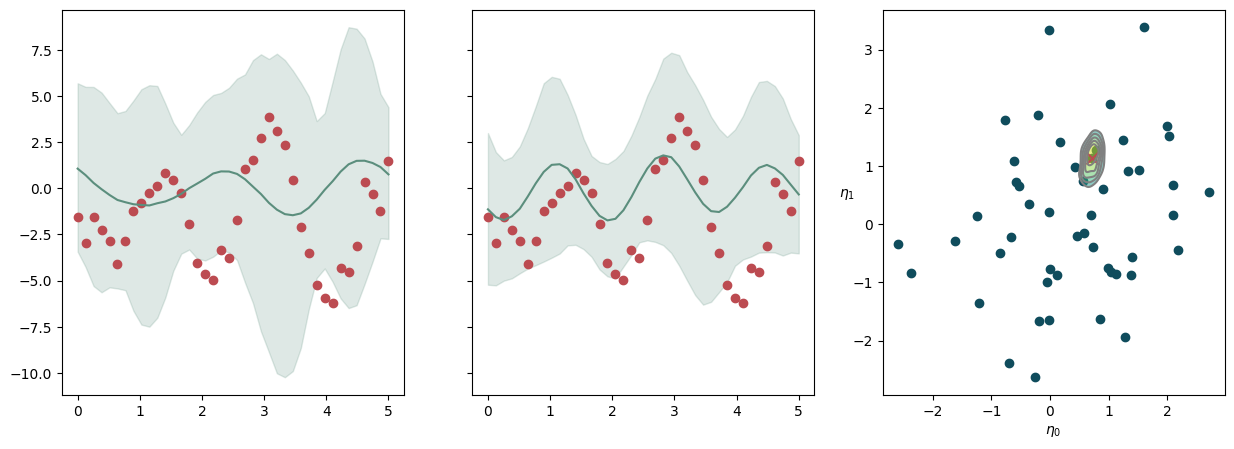

In [28]:
#fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)

sample_idx = 3

fig = plt.figure(figsize=(15, 5))
# Create the first subplot (e.g., 1 row, 3 columns, first subplot)
ax1 = fig.add_subplot(131)

# Create the second subplot, sharing the y-axis with ax1
ax2 = fig.add_subplot(132, sharey=ax1)

# Create the third subplot without sharing y-axis
ax3 = fig.add_subplot(133)

plt.setp(ax2.get_yticklabels(), visible=False)

axs = np.array([ax1,ax2,ax3])

bmlf.plot_Y_testing(idata,test_set_dic,conditional=False, ax_1 = False, ax_2 = axs[0], sample_idx=sample_idx)
bmlf.plot_Y_testing(idata,test_set_dic,conditional=True, ax_1 = False, ax_2 = axs[1], sample_idx=sample_idx)

#axs[0].set_ylabel(r'$\mathbf{Y}^{(2)}$', rotation=0)
axs[0].set_ylabel('', rotation=0)
axs[1].set_ylabel('')
axs[0].set_xlabel('')
axs[1].set_xlabel('')
#axs[0].set_title('Unconditional Predictive')
#axs[1].set_title('Conditional Predictive')

axs[2].scatter(η_xr.mean(dim='chain').mean(dim='draw').values[0,:],
                 η_xr.mean(dim='chain').mean(dim='draw').values[1,:],
                 c=bmlf.default_color_dict['Midnight green'] )
axs[2].set_xlabel(r'$\eta_0$')
axs[2].set_ylabel(r'$\eta_1$', rotation=0)

az.plot_kde(
    η_xr.sel(sample_idx=sample_idx, latent_factor_idx=0).stack(sample=('chain','draw')).values,
    η_xr.sel(sample_idx=sample_idx, latent_factor_idx=1).stack(sample=('chain','draw')).values,
    hdi_probs=[0.1,0.2,0.3,0.4,0.5],
    contourf_kwargs={'alpha':0.5},
    ax=axs[2]
)
axs[2].scatter(η_xr.mean(dim='chain').mean(dim='draw').values[0,[sample_idx]],
                 η_xr.mean(dim='chain').mean(dim='draw').values[1,[sample_idx]],
                 c=bmlf.default_color_dict['Bittersweet shimmer'] , marker='x', s=75 )


fig.savefig('prediction_on_test_set.png', bbox_inches='tight')

## Estimation of Root Mean Square Error for the two targets depending on presented information

In [29]:
test_set_dic['y2'].std()

3.898219443136505

In [30]:
np.sqrt(
    np.square(
        bmlf.sample_unconditional_predictive(idata, test_set_dic['X'], 123, bootstrap=1000)['Y2'].mean(dim='sample').values - test_set_dic['y2']
    ).mean()
)

2.9253471302650293

In [31]:
np.sqrt(
    np.square(
        bmlf.sample_conditional_predictive(idata, test_set_dic['X'], 123, Y1_test=test_set_dic['y1'], bootstrap=1000,).mean(dim='sample').values - test_set_dic['y2']
    ).mean()
)

2.395970125185048

In [32]:
test_set_dic['y1'].std()

3.151074415872225

In [33]:
np.sqrt(
    np.square(
        bmlf.sample_unconditional_predictive(idata, test_set_dic['X'], 123, bootstrap=1000)['Y1'].mean(dim='sample').values - test_set_dic['y1']
    ).mean()
)

2.8621722126283995

In [34]:
np.sqrt(
    np.square(
        bmlf.sample_conditional_predictive(idata, test_set_dic['X'], 123, Y2_test=test_set_dic['y2'], bootstrap=1000,).mean(dim='sample').values - test_set_dic['y1']
    ).mean()
)

2.4600981821641774